In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 1st assignment

# (a)

In [32]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
print("number of rating rows :", df_ratings.shape[0]) #check for the number of rows
df_movies = pd.read_csv('ml-latest-small/movies.csv')
print("number of movies rows :", df_movies.shape[0]) #check for the number of rows

#creating a table of interest
data=pd.merge(df_movies, df_ratings, on="movieId")
data.drop(['timestamp', 'genres'], axis=1, inplace= True)
data

number of rating rows : 100836
number of movies rows : 9742


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


### Ratings dataset

In [33]:
#print the first 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Movies dataset

In [34]:
#print the first 10 rows
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [35]:
# Calcola la matrice utente-oggetto (pivot table)
user_movie_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating')

In [36]:
user_movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# (b)

### 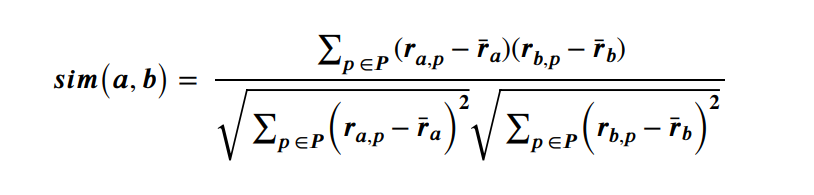

In [37]:
def pearson_correlation(user1_ratings, user2_ratings):
    # Exclude NaN values
    common_movies = user1_ratings.index.intersection(user2_ratings.index)
    if len(common_movies) == 0:
        return 0  # No common movies, return 0 correlation
    else:
        user1_common_ratings = user1_ratings[common_movies]
        user2_common_ratings = user2_ratings[common_movies]
        # Compute mean ratings
        mean_user1 = user1_common_ratings.mean()
        mean_user2 = user2_common_ratings.mean()
        # Compute numerator and denominators
        numerator = ((user1_common_ratings - mean_user1) * (user2_common_ratings - mean_user2)).sum()
        denominator1 = np.sqrt(((user1_common_ratings - mean_user1) ** 2).sum())
        denominator2 = np.sqrt(((user2_common_ratings - mean_user2) ** 2).sum())
        # Handle division by zero
        if denominator1 == 0 or denominator2 == 0:
            return 0
        else:
            return numerator / (denominator1 * denominator2)

In [38]:
# Compute user similarity values (return a dict with user : similarity with target_user_id)
def compute_user_similarity(target_user_id, df_ratings):
    user_ratings = df_ratings.pivot_table(index='movieId', columns='userId', values='rating')
    target_user_ratings = user_ratings[target_user_id]
    user_similarity = {}
    for user in user_ratings.columns:
        if user != target_user_id:
            similarity = pearson_correlation(target_user_ratings, user_ratings[user])
            user_similarity[user] = similarity
    return user_similarity

# (c)

## Prediction function
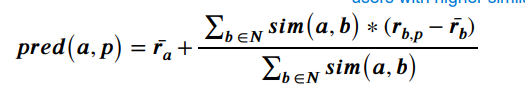

In [39]:
# Prediction function
def predict_rating(target_user_id, movie_id, df_ratings, user_similarity):
    # Filter ratings for the target user
    target_user_ratings = df_ratings[df_ratings['userId'] == target_user_id].set_index('movieId')['rating']
    # Filter ratings for the movie in question
    movie_ratings = df_ratings[df_ratings['movieId'] == movie_id].set_index('userId')
    
    # Filter similar users who have rated the movie
    similar_users = [(user, similarity) for user, similarity in user_similarity.items() if user in movie_ratings.index and similarity > 0]
    if not similar_users:
        return np.nan  # No similar users found
    # Sort similar users by similarity score and take top 10
    sorted_similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)[:10]
    
    # Calculate numerator and denominator for predicted rating
    numerator = sum(similarity * (movie_ratings.loc[user, 'rating'] - movie_ratings['rating'].mean()) for user, similarity in sorted_similar_users)
    denominator = sum(abs(similarity) for user, similarity in sorted_similar_users)
    if denominator == 0:
        return np.nan  # No similar users found
    
    # Calculate predicted rating
    target_user_mean_rating = target_user_ratings.mean()
    predicted_rating = target_user_mean_rating + (numerator / denominator)
    return predicted_rating


In [40]:

# Example usage (predicting rating for a movie not rated from user 1):
target_user_id = 1
movie_id = 2
user_similarity = compute_user_similarity(target_user_id, df_ratings)
predicted_rating = predict_rating(target_user_id, movie_id, df_ratings, user_similarity)
print("Predicted rating for user", target_user_id, "on movie", movie_id, ":", predicted_rating)

Predicted rating for user 1 on movie 2 : 4.089186824118774


# (d)

#### Select a user from the dataset, and for this user, show the 10 most similar users and the 10 most relevant movies that the recommender suggests

In [41]:
# Recommendation function
def recommend_movies(target_user_id, df_ratings, user_similarity):
    # Get movies not rated by target user
    target_user_rated_movies = df_ratings[df_ratings['userId'] == target_user_id]['movieId']    #take the rated movies for the target user
    all_movies = set(df_ratings['movieId'].unique())
    movies_to_recommend = all_movies - set(target_user_rated_movies)    #movies not yet watched     
    # Calculate predicted ratings for each movie
    predicted_ratings = {}
    for movie_id in movies_to_recommend:
        predicted_rating = predict_rating(target_user_id, movie_id, df_ratings, user_similarity)
        if not np.isnan(predicted_rating):
            predicted_ratings[movie_id] = predicted_rating
    # Select ordered recommended movies
    top_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    return top_movies

In [42]:
# Example usage (predicting top 10 movies recommended and top 10 most simalar users for user 1):
target_user_id = 1
user_similarity = compute_user_similarity(target_user_id, df_ratings)
top_similar_users = sorted(user_similarity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 similar users for user", target_user_id, ":", top_similar_users)

print("\nSearching for the recommended movies...")
recommended_movies = recommend_movies(target_user_id, df_ratings, user_similarity)
print("\nTop 10 recommended movies for user", target_user_id, ":")
for movie_id, rating in recommended_movies[:10]:
    movie_title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    print(movie_title, "(Predicted Rating:", round(rating, 2), ")")

Top 10 similar users for user 1 : [(301, 0.12479906517911302), (597, 0.10263065929063651), (414, 0.10134803449460647), (477, 0.09921664240127363), (57, 0.09907007791369302), (369, 0.09829454350405929), (206, 0.09685159012412195), (535, 0.09649292687545016), (590, 0.09519062577565124), (418, 0.0941526193713487)]

Searching for the recommended movies...

Top 10 recommended movies for user 1 :
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962) (Predicted Rating: 6.51 )
Lassie (1994) (Predicted Rating: 6.37 )
Kwaidan (Kaidan) (1964) (Predicted Rating: 6.37 )
Hush (2016) (Predicted Rating: 6.15 )
Tenebre (1982) (Predicted Rating: 6.12 )
Babylon 5 (Predicted Rating: 6.12 )
The Cloverfield Paradox (2018) (Predicted Rating: 6.11 )
Firewalker (1986) (Predicted Rating: 6.03 )
I, Frankenstein (2014) (Predicted Rating: 6.0 )
Losing Isaiah (1995) (Predicted Rating: 5.87 )


# (e)

### Version of the code above using cosine similarity instead of pearson similarity
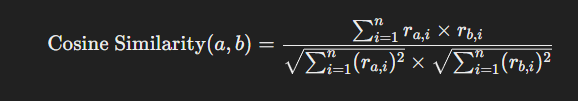
#### Overall, cosine similarity offers a flexible and effective method for measuring the similarity between users based on their preferences, making it a valuable tool in collaborative filtering-based recommendation systems

In [43]:
def cosine_similarity(user1_ratings, user2_ratings):
    #scalar product, sum each product for each element couples of the two vectors
    dot_product = (user1_ratings * user2_ratings).sum()
    magnitude_user1 = (user1_ratings ** 2).sum() ** 0.5
    magnitude_user2 = (user2_ratings ** 2).sum() ** 0.5
    similarity = dot_product / (magnitude_user1 * magnitude_user2)
    return similarity if not pd.isnull(similarity) else 0

def compute_user_similarity_cosine(target_user_id, df_ratings):
    user_ratings = df_ratings.pivot_table(index='movieId', columns='userId', values='rating')
    target_user_ratings = user_ratings[target_user_id]
    user_similarity = {}
    for user in user_ratings.columns:
        if user != target_user_id:
            similarity = cosine_similarity(target_user_ratings, user_ratings[user])
            user_similarity[user] = similarity
    return user_similarity

# Example usage (predicting top 10 movies recommended and top 10 most simalar users for user 1):
target_user_id = 1
user_similarity = compute_user_similarity_cosine(target_user_id, df_ratings)

top_similar_users = sorted(user_similarity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 similar users for user", target_user_id, ":", top_similar_users)
recommended_movies = recommend_movies(target_user_id, df_ratings, user_similarity)
print("\nSearching for the recommended movies...")

print("\nTop 10 recommended movies for user", target_user_id, ":")
for movie_id, rating in recommended_movies[:10]:
    movie_title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    print(movie_title, "(Predicted Rating:", round(rating, 2), ")")

Top 10 similar users for user 1 : [(266, 0.3574077096032742), (313, 0.3515615184909569), (368, 0.34512705158353046), (57, 0.3450342788075837), (91, 0.33472692041817076), (469, 0.330664315065201), (39, 0.32978223365752674), (288, 0.3296995292829289), (452, 0.3280483444245288), (45, 0.3279216897772204)]

Searching for the recommended movies...

Top 10 recommended movies for user 1 :
Paper Heart (2009) (Predicted Rating: 6.1 )
Bent (1997) (Predicted Rating: 5.65 )
Under the Skin (2013) (Predicted Rating: 5.57 )
The Cloverfield Paradox (2018) (Predicted Rating: 5.38 )
Kind Hearts and Coronets (1949) (Predicted Rating: 5.29 )
The Great Train Robbery (1903) (Predicted Rating: 5.28 )
Beautiful (2000) (Predicted Rating: 5.26 )
Good Burger (1997) (Predicted Rating: 5.25 )
Stay (2005) (Predicted Rating: 5.25 )
Pickpocket (1959) (Predicted Rating: 5.2 )


# 2nd Assignment

## (a)

In [44]:
#average aggragation
def avg_aggregation(users, df_ratings, df_movies):
    movie_ratings = {}
    avg_movies={}
    # Iterate over each user
    for user in users:
        user_similarity = compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)
        
        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            if movie_id not in movie_ratings:
                movie_ratings[movie_id] = []
            movie_ratings[movie_id].append(rating)

    # Compute average ratings for movies that all users have a prediction for
    avg_movies = {movie_id: sum(ratings) / len(ratings) for movie_id, ratings in movie_ratings.items() if len(ratings) == len(users)}
    # Sort movies by average rating
    avg_movies_oredered = dict(sorted(avg_movies.items(), key=lambda item: item[1], reverse=True))

    # Print only the top 10 movies
    print("Top 10 Movies:")
    for movie_id, avg_rating in list(avg_movies_oredered.items())[:10]:
        title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
        print(f"{title}: {avg_rating}")



#least misery method
def min_aggregation(users, df_ratings, df_movies):
    movie_ratings= {}
    min_rating_movies={}
    # Iterate over each user
    for user in users:
        user_similarity =  compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)

        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            movie_ratings.setdefault(movie_id, []).append(rating)

    # Compute maximum ratings for movies that all users have a prediction for
    min_rating_movies = {movie_id: np.min(ratings) for movie_id, ratings in movie_ratings.items() if len(ratings) == len(users)}

    # Sort movies by minimum rating
    min_rating_movies_oredered = dict(sorted(min_rating_movies.items(), key=lambda item: item[1], reverse=True))
    # Print only the top 10 movies
    print("Top 10 Movies:")
    for movie_id, min_rating in list(min_rating_movies_oredered.items())[:10]:
        title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
        print(f"{title}: {min_rating}")


users = [1, 6, 608]

# Call the function average
print("\nResult with average aggregation: \n")
avg_aggregation(users, df_ratings, df_movies)

# Call the function least misery
print("\nResult with least misery aggregation: \n")
min_aggregation(users, df_ratings, df_movies)



Result with average aggregation: 

Top 10 Movies:
Exorcist III, The (1990): 5.209116976629596
Class, The (Klass) (2007): 5.03582369391201
To Be or Not to Be (1942): 4.952241040621208
War for the Planet of the Apes (2017): 4.9008413080371405
Under the Skin (2013): 4.9003370834105375
The Cloverfield Paradox (2018): 4.863372980860582
Death Note (2017): 4.82463889918967
Scratch (2001): 4.792207573957112
Skin I Live In, The (La piel que habito) (2011): 4.767261842983243
Room in Rome (Habitación en Roma) (2010): 4.734268858680166

Result with least misery aggregation: 

Top 10 Movies:
Class, The (Klass) (2007): 4.634175691937425
War for the Planet of the Apes (2017): 4.499726298794305
Under the Skin (2013): 4.341001366638377
Scratch (2001): 4.300842358604092
Waydowntown (2000): 4.176615909349916
Exorcist III, The (1990): 4.134433197383224
Butterfly (La lengua de las mariposas) (1999): 4.134175691937425
Love's Labour's Lost (2000): 4.134175691937425
To Be or Not to Be (1942): 4.0520775019727

## (b)

In [45]:
import statistics

def dev_aggregation(users, df_ratings, df_movies):
    movie_ratings= {}
    dev_avg_movies = {}
    # Iterate over each user
    for user in users:
        user_similarity = compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)
        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            if movie_id not in movie_ratings:
                movie_ratings[movie_id] = []
            movie_ratings[movie_id].append(rating)

    for movie_id, ratings in movie_ratings.items():
        #use only the movies all users have a prediction for
        if len(ratings) == len(users):
            #Compute standard deviation
            dev = statistics.stdev(ratings)
            #Compute average
            avg=sum(ratings) / len(ratings)
            dev_avg_movies[movie_id] = (dev,avg)
    
    #Sort movie by their average and their deviation
    dev_avg_movies_ordered = sorted(dev_avg_movies.items(), key=lambda x: (x[1][1] * (-x[1][0])), reverse=True)

    # Print only the top 10 movies
    print("Top 10 Movies:")
    for movie_id, val_rating in dev_avg_movies_ordered[:10]:
        title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
        print(f"{title}: Wheight={val_rating[0]}, Average={val_rating[1]}")

users = [1, 6, 608]

# Call the function
dev_aggregation(users, df_ratings, df_movies)

Top 10 Movies:
Last Knights (2015): Wheight=0.05031791413350696, Average=3.183330798577138
Search Party (2014): Wheight=0.10016104353168272, Average=3.167379677570151
Victor Frankenstein (2015): Wheight=0.10016104353168272, Average=3.167379677570151
House II: The Second Story (1987): Wheight=0.11586278533019771, Average=3.7501659975711017
Star Wars: Episode III - Revenge of the Sith (2005): Wheight=0.147969280930065, Average=3.839917300926317
Stranger in the House (1997): Wheight=0.19277906149524246, Average=2.9751890722526273
Left Behind: The Movie (2000): Wheight=0.17157524366053759, Average=3.42248558809066
Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002): Wheight=0.1771067017555019, Average=3.6536909877642203
Lockout (2012): Wheight=0.17889092265072476, Average=3.641774346175474
I Sell the Dead (2008): Wheight=0.20376446625518962, Average=3.4429027307048194
